In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling as pp

In [4]:
bike_data = pd.read_csv('datasets/bike_ride.csv')

In [6]:
bike_data.head()

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,14.395,81,0.0,3,13,16
1,1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,8,32,40
2,2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,5,27,32
3,3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,3,10,13
4,4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,0,1,1


In [7]:
bike_data.profile_report(style={'full_width':True})

In [8]:
report = bike_data.profile_report()

In [10]:
report.to_file('report.html')

In [11]:
coloumns_to_drop = ['atemp','Unnamed_0','casual','registered']

In [12]:
bike_data = bike_data.drop(coloumns_to_drop, axis=1)

In [14]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,81,0.0,16
1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,80,0.0,40
2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,80,0.0,32
3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,75,0.0,13
4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,75,0.0,1


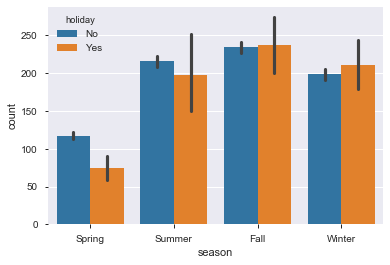

In [17]:
sns.barplot(x='season', y='count',hue='holiday',data=bike_data)
plt.show()

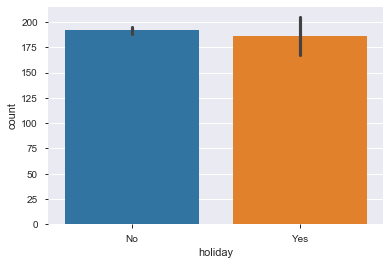

In [18]:
sns.barplot(x='holiday',y='count',data=bike_data)
plt.show()

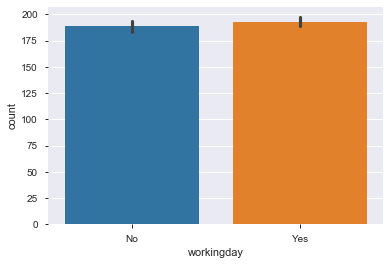

In [20]:
sns.barplot(x='workingday',y='count',data=bike_data)
plt.show()

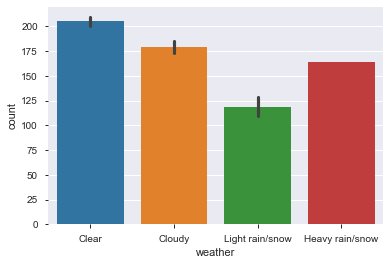

In [21]:
sns.barplot(x='weather',y='count',data=bike_data)
plt.show()

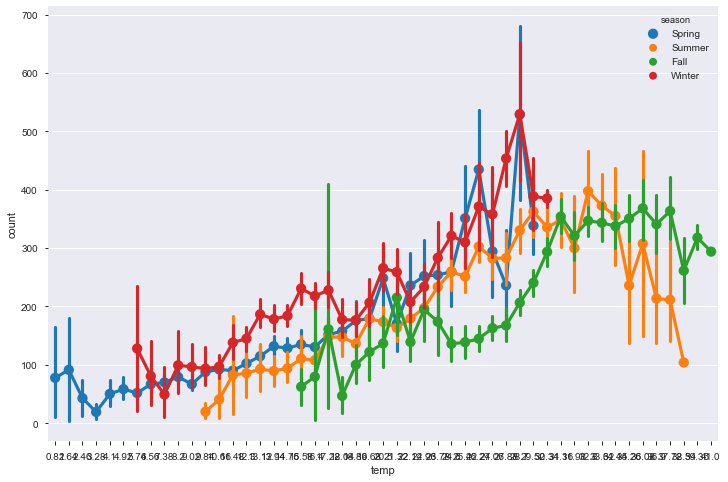

In [25]:
plt.figure(figsize=(12,8))
sns.pointplot(x='temp',y='count',hue='season',data=bike_data)
plt.show()

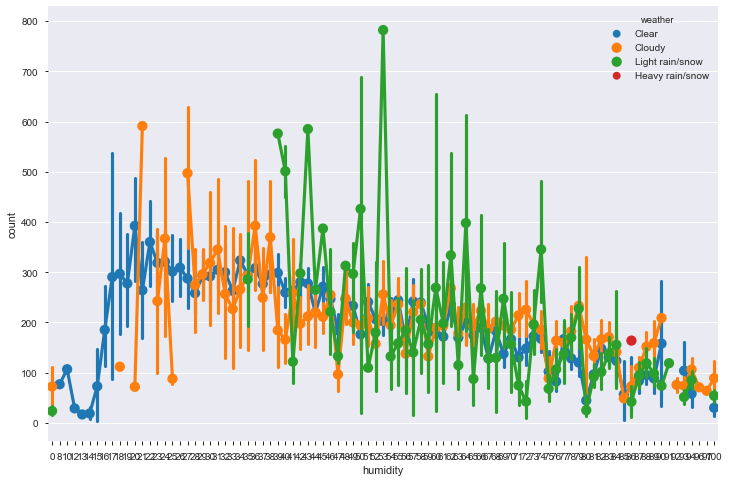

In [28]:
plt.figure(figsize=(12,8))
sns.pointplot(x='humidity',y='count',hue='weather',data=bike_data)
plt.show()

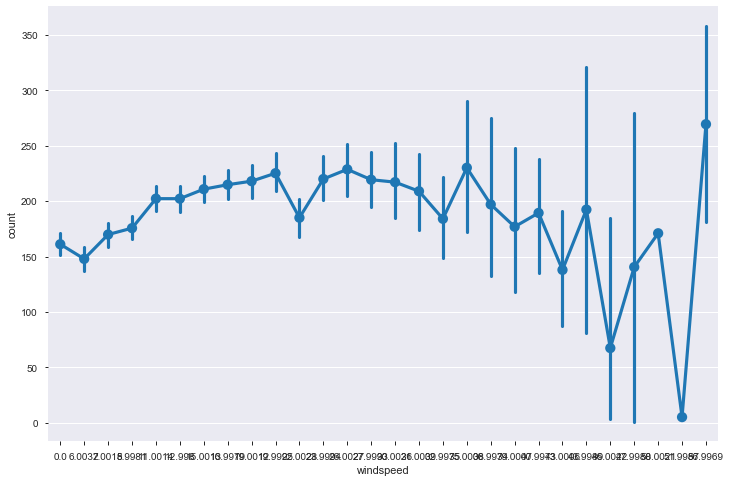

In [29]:
plt.figure(figsize=(12,8))
sns.pointplot(x='windspeed',y='count',data=bike_data)
plt.show()

In [30]:
bike_data['datetime']=pd.DatetimeIndex(bike_data['datetime'])

In [34]:
hours = [x.hour for x in bike_data['datetime']]

In [36]:
hours = []
for i in bike_data['datetime']:
    hours.append(i.hour)

In [38]:
bike_data['hours'] = hours

In [39]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,hours
0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,81,0.0,16,0
1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,80,0.0,40,1
2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,80,0.0,32,2
3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,75,0.0,13,3
4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,75,0.0,1,4


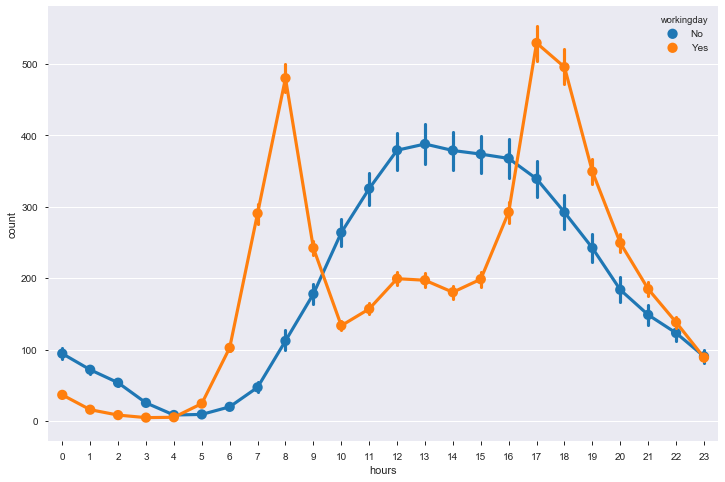

In [41]:
plt.figure(figsize=(12,8))
sns.pointplot(x='hours',y='count',hue='workingday',data=bike_data)
plt.show()

In [42]:
columns_to_drop = ['workingday','holiday']
bike_data = bike_data.drop(columns_to_drop, axis=1)

In [45]:
columns_to_drop = ['datetime']
bike_data = bike_data.drop(columns_to_drop,axis=1)

In [46]:
bike_data.head()

,season,weather,temp,humidity,windspeed,count,hours
0,Spring,Clear,9.84,81,0.0,16,0
1,Spring,Clear,9.02,80,0.0,40,1
2,Spring,Clear,9.02,80,0.0,32,2
3,Spring,Clear,9.84,75,0.0,13,3
4,Spring,Clear,9.84,75,0.0,1,4


In [47]:
bike_data['season'].value_counts()

Winter    2734
Fall      2733
Summer    2733
Spring    2686
Name: season, dtype: int64

In [48]:
season_map = {'Summer':0,'Spring':1,'Fall':2,'Winter':3}
bike_data['season'] = bike_data['season'].map(season_map)

In [49]:
bike_data.head()

,season,weather,temp,humidity,windspeed,count,hours
0,1,Clear,9.84,81,0.0,16,0
1,1,Clear,9.02,80,0.0,40,1
2,1,Clear,9.02,80,0.0,32,2
3,1,Clear,9.84,75,0.0,13,3
4,1,Clear,9.84,75,0.0,1,4


In [50]:
bike_data['weather'].value_counts()

Clear              7192
Cloudy             2834
Light rain/snow     859
Heavy rain/snow       1
Name: weather, dtype: int64

In [51]:
season_map = {'Clear':0,'Cloudy':1,
              'Light rain/snow':2,
              'Heavy rain/snow':3}
bike_data['weather'] = bike_data['weather'].map(season_map)

In [53]:
bike_data.head()

,season,weather,temp,humidity,windspeed,count,hours
0,1,0,9.84,81,0.0,16,0
1,1,0,9.02,80,0.0,40,1
2,1,0,9.02,80,0.0,32,2
3,1,0,9.84,75,0.0,13,3
4,1,0,9.84,75,0.0,1,4


In [54]:
bike_data.describe()

,season,weather,temp,humidity,windspeed,count,hours
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,1.502297,0.418427,20.23086,61.886460,12.799395,191.574132,11.541613
std,1.120053,0.633839,7.79159,19.245033,8.164537,181.144454,6.915838
min,0.000000,0.000000,0.82000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,13.94000,47.000000,7.001500,42.000000,6.000000
50%,2.000000,0.000000,20.50000,62.000000,12.998000,145.000000,12.000000
75%,3.000000,1.000000,26.24000,77.000000,16.997900,284.000000,18.000000
max,3.000000,3.000000,41.00000,100.000000,56.996900,977.000000,23.000000


In [55]:
columns_to_scale = ['temp','humidity','windspeed']

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
temp_scaler = StandardScaler()
bike_data['temp'] = temp_scaler.fit_transform(bike_data['temp'].values.reshape(-1,1))

In [58]:
humid_scaler = StandardScaler()
bike_data['humidity'] = humid_scaler.fit_transform(bike_data['humidity'].values.reshape(-1,1))

In [59]:
wind_scaler = StandardScaler()
bike_data['windspeed'] = wind_scaler.fit_transform(bike_data['windspeed'].values.reshape(-1,1))

In [61]:
bike_data.head()

,season,weather,temp,humidity,windspeed,count,hours
0,1,0,-1.333661,0.993213,-1.567754,16,0
1,1,0,-1.438907,0.941249,-1.567754,40,1
2,1,0,-1.438907,0.941249,-1.567754,32,2
3,1,0,-1.333661,0.681430,-1.567754,13,3
4,1,0,-1.333661,0.681430,-1.567754,1,4


In [62]:
bike_data.to_csv('bike_processed.csv')

In [63]:
bike_data

,season,weather,temp,humidity,windspeed,count,hours
0,1,0,-1.333661,0.993213,-1.567754,16,0
1,1,0,-1.438907,0.941249,-1.567754,40,1
2,1,0,-1.438907,0.941249,-1.567754,32,2
3,1,0,-1.333661,0.681430,-1.567754,13,3
4,1,0,-1.333661,0.681430,-1.567754,1,4
...,...,...,...,...,...,...,...
10881,3,0,-0.596935,-0.617666,1.617227,336,19
10882,3,0,-0.702182,-0.253919,0.269704,241,20
10883,3,0,-0.807428,-0.046064,0.269704,168,21
10884,3,0,-0.807428,-0.046064,-0.832442,129,22
